In [306]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from PIL.ExifTags import TAGS, GPSTAGS
from PIL import Image

In [215]:
image = Image.open("/Users/millie/downloads/20181129_132810.jpg")

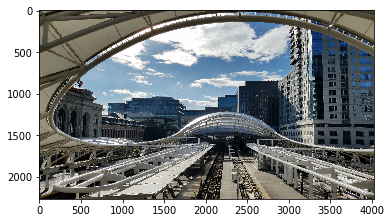

In [216]:
plt.imshow(image)

In [218]:
info = image._getexif()

In [286]:
def gps_find(info):
    positions = [info[34853][2], info[34853][4]]
    coordinates = []
    for pos in positions:
        gps_coord = pos[0][0]/pos[0][1] + pos[1][0]/(pos[1][1]*60) + pos[2][0]/(pos[2][1]*3600)
        coordinates.append(gps_coord)
    return pd.DataFrame([{'latitude':coordinates[0], 'longitude':-1*coordinates[1]}])

In [287]:
coordinates = gps_find(info)

In [307]:
file_Name = "testfile"
# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object a to the
# file named 'testfile'
pickle.dump(coordinates,fileObject)   

# here we close the fileObject
fileObject.close()

In [311]:
coords_open = pickle.load( open( "testfile", "rb" ) )

In [312]:
coords_open

,latitude,longitude
0,39.754343,-105.000114


[39.75434261] [-105.00011364]


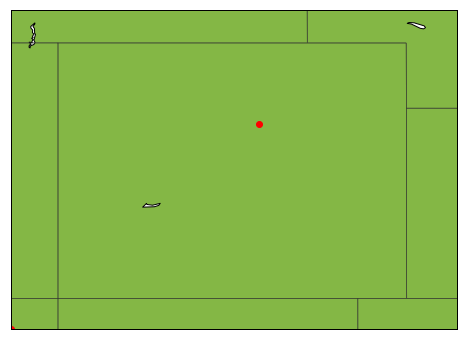

In [304]:


lats = coordinates.latitude.values
lons = coordinates.longitude.values

print (lats, lons)

fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='merc', \
            llcrnrlon=-110,llcrnrlat=36.5,urcrnrlon=-101.,urcrnrlat= 41.5, \
            resolution='i')

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = '#84b745')
m.drawmapboundary()
m.drawstates(color='0.2')

x, y = m(lons, lats)  # transform coordinates
m.plot(x, y, 10, marker='o', color='red') 

plt.show()

In [317]:
import pandas as pd
import boto3

data = coordinates

s3 = boto3.client("s3")

remote_pathname = 'testfile' 

s3.upload_file(
    Bucket='image-location-data',
    Filename='testfile',
    Key='testfile'
    )

response = s3.list_objects(
    Bucket='image-location-data'
)

print(response)

{'ResponseMetadata': {'RequestId': '023B109C2765A5E4', 'HostId': '024xKtyRNSzUeIZxF5UdZJ3FDNMNCNGJajU4zWaT9lo+6WwSIYBFAjZ2SrHT3FBBePloIYKQtvs=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': '024xKtyRNSzUeIZxF5UdZJ3FDNMNCNGJajU4zWaT9lo+6WwSIYBFAjZ2SrHT3FBBePloIYKQtvs=', 'x-amz-request-id': '023B109C2765A5E4', 'date': 'Sat, 08 Dec 2018 17:58:04 GMT', 'x-amz-bucket-region': 'us-east-2', 'content-type': 'application/xml', 'transfer-encoding': 'chunked', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'IsTruncated': False, 'Marker': '', 'Contents': [{'Key': 'testfile', 'LastModified': datetime.datetime(2018, 12, 8, 17, 58, 4, tzinfo=tzutc()), 'ETag': '"16450a32f4efbcf633a860fe36910319"', 'Size': 830, 'StorageClass': 'STANDARD', 'Owner': {'ID': '1f9d48c07d5351034154bfc2cd957296a652bfaa39a248f8190b9821961a3cca'}}], 'Name': 'image-location-data', 'Prefix': '', 'MaxKeys': 1000, 'EncodingType': 'url'}


In [316]:
! ls

Mapping.ipynb flask_toy.py  testfile
